In [1]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

In [2]:
abb = pd.read_csv('./state-abbrevs.csv')
abb

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [3]:
area = pd.read_csv('./state-areas.csv')
area

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


In [4]:
pop = pd.read_csv('./state-population.csv')
pop

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


### 首先将缩写abb和人口数量pop进行合并merge

In [11]:
# 内合并，为什么合并之后的数据变少了呢？？？
# 
pop2 = pd.merge(abb,pop,how = 'outer',left_on='abbreviation',right_on='state/region')
pop2

,state,abbreviation,state/region,ages,year,population
0,Alabama,AL,AL,under18,2012,1117489.0
1,Alabama,AL,AL,total,2012,4817528.0
2,Alabama,AL,AL,under18,2010,1130966.0
3,Alabama,AL,AL,total,2010,4785570.0
4,Alabama,AL,AL,under18,2011,1125763.0
...,...,...,...,...,...,...
2539,NaN,NaN,USA,total,2010,309326295.0
2540,NaN,NaN,USA,under18,2011,73902222.0
2541,NaN,NaN,USA,total,2011,311582564.0
2542,NaN,NaN,USA,under18,2012,73708179.0


In [16]:
pop2.drop(labels='abbreviation',axis = 1,inplace=True)

### 空数据的补全

In [19]:
# isnull返回是否为空，为空True，不为空False
# any 返回：只要有一个为空True，所有都不为空返回False
pop2.isnull().any()

state            True
state/region    False
ages            False
year            False
population       True
dtype: bool

In [21]:
pop2.notnull().all()

state           False
state/region     True
ages             True
year             True
population      False
dtype: bool

In [26]:
cond = pop2['state'].isnull()
pop2[cond]['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [32]:
# USA --- United States
# PR  --- Puerto Rico:波多黎各州
cond = pop2['state/region'] == 'USA'
pop2['state'][cond] = 'United States'

d:\python3.7.4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
cond = pop2['state/region'] == 'PR'
pop2['state'][cond] = 'Puerto Rico'

d:\python3.7.4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
pop2.isnull().any()

state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

In [41]:
cond = pop2.isnull().any(axis = 1)
pop2[cond].shape

(20, 5)

### 补全无法进行，空数据删除

In [43]:
pop2.dropna(inplace=True)

In [46]:
pop2.isnull().any()
pop2.notnull().all()

state           True
state/region    True
ages            True
year            True
population      True
dtype: bool

### pandas中的query方法，根据条件进行了检索数据

In [50]:
pop3 = pop2.query("year == 2012 and ages == 'total'")
pop3

,state,state/region,ages,year,population
1,Alabama,AL,total,2012,4817528.0
95,Alaska,AK,total,2012,730307.0
97,Arizona,AZ,total,2012,6551149.0
191,Arkansas,AR,total,2012,2949828.0
193,California,CA,total,2012,37999878.0
287,Colorado,CO,total,2012,5189458.0
289,Connecticut,CT,total,2012,3591765.0
383,Delaware,DE,total,2012,917053.0
385,District of Columbia,DC,total,2012,633427.0
479,Florida,FL,total,2012,19320749.0


### 调整了行索引

In [52]:
pop3.set_index('state',inplace=True)

In [54]:
area

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


In [53]:
pop3

,state/region,ages,year,population
state,,,,
Alabama,AL,total,2012,4817528.0
Alaska,AK,total,2012,730307.0
Arizona,AZ,total,2012,6551149.0
Arkansas,AR,total,2012,2949828.0
California,CA,total,2012,37999878.0
Colorado,CO,total,2012,5189458.0
Connecticut,CT,total,2012,3591765.0
Delaware,DE,total,2012,917053.0
District of Columbia,DC,total,2012,633427.0


### 将面积进行了集成，共同的索引州全称

In [60]:
pop4 = pd.merge(area,pop3,how = 'outer',left_on='state',right_index=True).set_index('state')
pop4

,area (sq. mi),state/region,ages,year,population
state,,,,,
Alabama,52423.0,AL,total,2012,4817528.0
Alaska,656425.0,AK,total,2012,730307.0
Arizona,114006.0,AZ,total,2012,6551149.0
Arkansas,53182.0,AR,total,2012,2949828.0
California,163707.0,CA,total,2012,37999878.0
Colorado,104100.0,CO,total,2012,5189458.0
Connecticut,5544.0,CT,total,2012,3591765.0
Delaware,1954.0,DE,total,2012,917053.0
Florida,65758.0,FL,total,2012,19320749.0


### 填充的空数据，观察数据后，进行了填充（全美面积，求和）

In [63]:
area['area (sq. mi)'].sum()

3790399

In [65]:
pop4.fillna(3790399,inplace=True)

In [69]:
pop4

,area (sq. mi),state/region,ages,year,population
state,,,,,
Alabama,52423.0,AL,total,2012,4817528.0
Alaska,656425.0,AK,total,2012,730307.0
Arizona,114006.0,AZ,total,2012,6551149.0
Arkansas,53182.0,AR,total,2012,2949828.0
California,163707.0,CA,total,2012,37999878.0
Colorado,104100.0,CO,total,2012,5189458.0
Connecticut,5544.0,CT,total,2012,3591765.0
Delaware,1954.0,DE,total,2012,917053.0
Florida,65758.0,FL,total,2012,19320749.0


In [71]:
DataFrame(pop_density,columns = ['pop_density'])

,pop_density
state,
Alabama,91.897221
Alaska,1.112552
Arizona,57.463195
Arkansas,55.466662
California,232.121278
Colorado,49.850701
Connecticut,647.865260
Delaware,469.320880
Florida,293.815946


### 计算人口密度，并且进行了排序

In [68]:
# 人口密度是Series
pop_density = pop4['population']/pop4['area (sq. mi)']
pop_density

state
Alabama                   91.897221
Alaska                     1.112552
Arizona                   57.463195
Arkansas                  55.466662
California               232.121278
Colorado                  49.850701
Connecticut              647.865260
Delaware                 469.320880
Florida                  293.815946
Georgia                  166.814926
Hawaii                   127.157885
Idaho                     19.091942
Illinois                 222.179495
Indiana                  179.510763
Iowa                      54.642103
Kansas                    35.067184
Kentucky                 108.379649
Louisiana                 88.770596
Maine                     37.542063
Maryland                 474.318369
Massachusetts            629.588157
Michigan                 102.081593
Minnesota                 61.875551
Mississippi               61.660197
Missouri                  86.423876
Montana                    6.837955
Nebraska                  23.983945
Nevada                

In [75]:
result = pd.merge(pop4,DataFrame(pop_density,columns = ['pop_density']),left_index=True,right_index=True)
result

,area (sq. mi),state/region,ages,year,population,pop_density
state,,,,,,
Alabama,52423.0,AL,total,2012,4817528.0,91.897221
Alaska,656425.0,AK,total,2012,730307.0,1.112552
Arizona,114006.0,AZ,total,2012,6551149.0,57.463195
Arkansas,53182.0,AR,total,2012,2949828.0,55.466662
California,163707.0,CA,total,2012,37999878.0,232.121278
Colorado,104100.0,CO,total,2012,5189458.0,49.850701
Connecticut,5544.0,CT,total,2012,3591765.0,647.865260
Delaware,1954.0,DE,total,2012,917053.0,469.320880
Florida,65758.0,FL,total,2012,19320749.0,293.815946


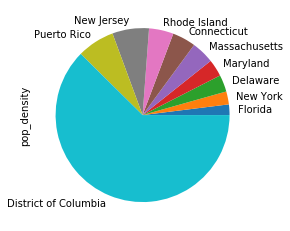

In [83]:
result.sort_values(by = 'pop_density',ascending=True)['pop_density'][-10:].plot(kind = 'pie')